### начальные условия

In [148]:
gamma = 5/3
N = 1000
m_step = 1/N
t_step = 1e-4
import numpy as np
import sys

### заполнение u, v, r, p, e   
{(t, n): value}

In [149]:
class genMap:
    def __init__(self, nmin, nmax, jmin, jmax, name):
        self.jmin = jmin
        self.jmax = jmax
        self.nmin = nmin
        self.nmax = nmax
        self.name = name
        self.arr = np.zeros((int(nmax - nmin + 1), int(jmax - jmin + 1)))
    def get(self, n, j):
#         if (int(n - self.nmin) != (n - self.nmin) or int(j - self.jmin) != (j - self.jmin)):
#             print("warning 1:", int(n - self.nmin) - (n - self.nmin), int(j - self.jmin) - (j - self.jmin))
#         if (int(n - self.nmin) < 0 or int(j - self.jmin)  < 0):
#             print("warning 1 2:", int(n - self.nmin) - (n - self.nmin), int(j - self.jmin) - (j - self.jmin))
        return (self.arr[int(n - self.nmin), int(j - self.jmin)])
    def asg(self, n, j, val):
        if (val != val):
            print("warning 2 3:", val, self.name)
            sys.exit("Error message")
#         if (int(n - self.nmin) != (n - self.nmin) or int(j - self.jmin) != (j - self.jmin)):
#             print("warning 2:", int(n - self.nmin) - (n - self.nmin), int(j - self.jmin) - (j - self.jmin))
#         if (int(n - self.nmin) < 0 or int(j - self.jmin)  < 0):
#             print("warning 2 2:", int(n - self.nmin) - (n - self.nmin), int(j - self.jmin) - (j - self.jmin))
        self.arr[int(n - self.nmin), int(j - self.jmin)] = val

In [137]:
u = genMap(0.5, N +.5, 0, N, 'u')
v = genMap(0, N +1, 0.5, N + .5, 'v')
r = genMap(0, N +1, 0, N + 1, 'r')
p = genMap(0, N +1, .5, N + .5, 'p')
e = genMap(0, N +1, .5, N + .5, 'e')

#### заполнение r в начальный момент времени

In [138]:
r.asg(0, 0, 0)
for i in range(1, N+2):
    r.asg(0, i, ((r.get(0, i-1))**3 + 1/N)**(1/3))

#### заполнение p в начальный момент времени

In [139]:
for i in range(1, N+1):
    p.asg(0, i - 0.5, 3 * (gamma - 1))

#### заполнение $\varepsilon$ в начальный момент времени

In [140]:
for i in range(1, N+1):
    e.asg(0, i - 0.5, 1)

#### заполнение u в начальный момент времени

In [141]:
# for i in range(N+1):
#     u[(0.5, i)] = 0

#### заполнение v в начальный момент времени

In [142]:
for i in range(1, N+1):
    v.asg(0, i - 0.5, 1/3)

In [143]:
np.max(p.arr[9, :])

0.0

In [144]:
for n in range(0, N+1):
    if n % 100 == 0:
        print(n)
    if n != 0 :
#         u.asg(n + 0.5, 0, 0)
        for j in range(1, N):
            u.asg(n + 0.5, j, u.get(n-0.5, j) - t_step * (r.get(n, j)**2) * (p.get(n, j + 0.5) - p.get(n, j - 0.5))/m_step)
        u.asg(n + 0.5, N, u.get(n - 0.5, N)  + t_step * (r.get(n, N)**2) * p.get(n, N - 0.5)/m_step)
#     r[(n+1, 0)] = 0 
    for j in range(1, N+1):
        r.asg(n+1, j, r.get(n, j) + u.get(n + 0.5, j) * t_step)
    for j in range(1, N+1):
        v.asg(n + 1, j - 0.5, (r.get(n+1, j)**3 - r.get(n+1, j-1)**3)/(3*m_step))
    for j in range(1, N+1):
        tmp = (gamma - 1)*(v.get(n, j-0.5) - v.get(n+1, j - 0.5))/2
        e.asg(n+1, j - 0.5, e.get(n, j - 0.5) *(v.get(n+1, j - 0.5) / v.get(n, j - 0.5)) * (v.get(n, j - 0.5) + tmp)/(v.get(n+1, j - 0.5) - tmp))
    for j in range(1, N+1):
        p.asg(n+1, j - 0.5, (gamma - 1)*e.get(n+1, j - 0.5)/v.get(n+1, j - 0.5))

0
100
200
300
400
500
600
700
800
900
1000


In [145]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
lst_rn = [0, 1, 5, 15, 25, 50, 99]
lst_rn = [N]
n

1000

In [146]:
# n = 0
# for n in lst_rn:
#     plt.plot(np.arange(0, N+1), [r[(n, i)] for i in range(N+1)])
# plt.title('r')

[Text(0, 0.5, 'e')]

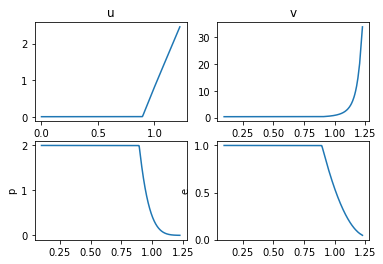

In [147]:
fig, axs = plt.subplots(2, 2)
for n in lst_rn:
    axs[0, 0].plot([r.get(n, i) for i in range(N+1)], [u.get(n + .5, i) for i in range(N+1)])
    axs[0, 0].set_title('u')
for n in lst_rn:
    axs[0, 1].plot([r.get(n, i) for i in range(1, N+1)], [v.get(n, i -.5) for i in range(1, N+1)])
axs[0, 1].set_title("v")
for n in lst_rn:
    axs[1, 0].plot([r.get(n, i) for i in range(1, N+1)], [p.get(n, i - .5) for i in range(1, N+1)])
axs[1, 0].set(ylabel  = 'p')
for n in lst_rn:
    axs[1, 1].plot([r.get(n, i) for i in range(1, N+1)], [e.get(n, i - .5) for i in range(1, N+1)])
axs[1, 1].set(ylabel  = 'e')

In [122]:
np.min([p[(n, i - .5)] for i in range(1, N+1)])

TypeError: 'genMap' object is not subscriptable

In [ ]:
[r[(0, i)] for i in range(1, N+1)]